# Table of Contents
1. Imports
2. Loading Data
3. Data Exploration
4. Preprocessing
5. Build the Model
6. Train the Model
7. Model accuracy

## Imports

In [22]:
from keras.datasets import mnist
from tensorflow.keras.utils import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
import keras
keras.__version__

'2.10.0'

## Loading Data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Data Exploration

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0].shape

(28, 28)

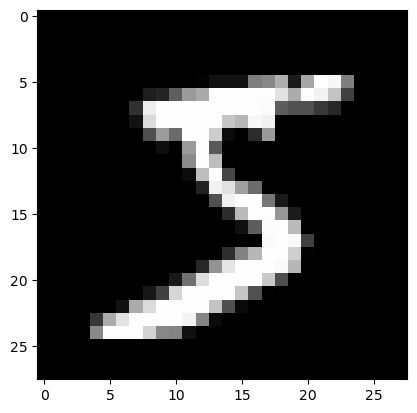

In [5]:
# Let's look at the first entry.
plt.imshow(X_train[0], cmap='gray')

In [6]:
# It looks like a letter s or a number 5.
y_train[0]

5

In [7]:
# We're looking at predicting numbers. We don't want 28 x 28 pixels. We need it flat.

## Preprocessing

In [8]:
image_height, image_width = 28,28

X_train = X_train.reshape(60000, image_height*image_width)

In [9]:
X_test = X_test.reshape(10000, image_height * image_width)

In [10]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [11]:
# Confirm the data is grey scale
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [13]:
X_train /= 255.0
X_test /= 255.0
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [14]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [15]:
y_train = to_categorical(y_train, 10)
print(y_train.shape)
y_test = to_categorical(y_test, 10)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Build the Model

In [16]:
model = Sequential()

2023-07-28 16:35:23.992291: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
model.add(Dense(512, activation = 'relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Train the Model

In [28]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1850 - accuracy: 0.9434 - val_loss: 0.0966 - val_accuracy: 0.9702
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0804 - accuracy: 0.9746 - val_loss: 0.1140 - val_accuracy: 0.9653
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0570 - accuracy: 0.9823 - val_loss: 0.0653 - val_accuracy: 0.9808
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0419 - accuracy: 0.9869 - val_loss: 0.0680 - val_accuracy: 0.9805
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0375 - accuracy: 0.9875 - val_loss: 0.0799 - val_accuracy: 0.9782
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0290 - accuracy: 0.9908 - val_loss: 0.0908 - val_accuracy: 0.9788
Epoch 7/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0246 - accuracy: 0.9922 - val_loss: 0.0923 - val_ac

## Model Accuracy

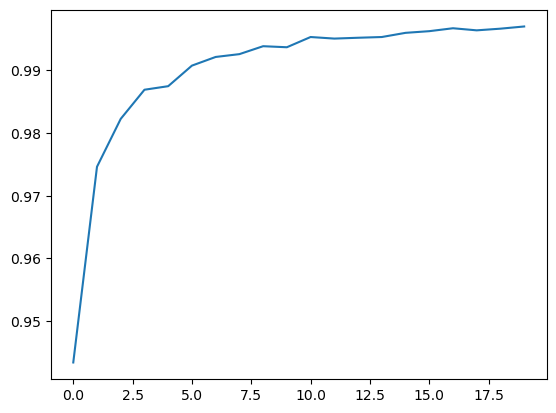

In [31]:
# Accuracy
plt.plot(history.history['accuracy'])

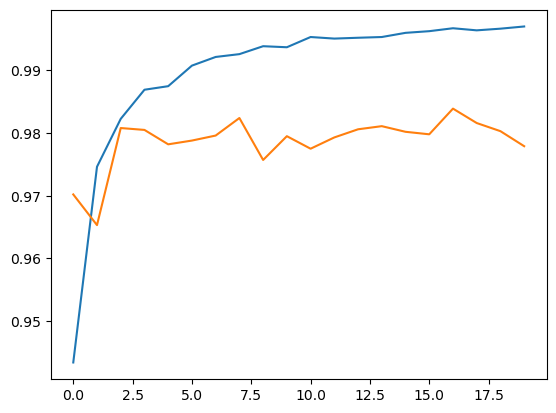

In [34]:
# Accuracy of training and validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

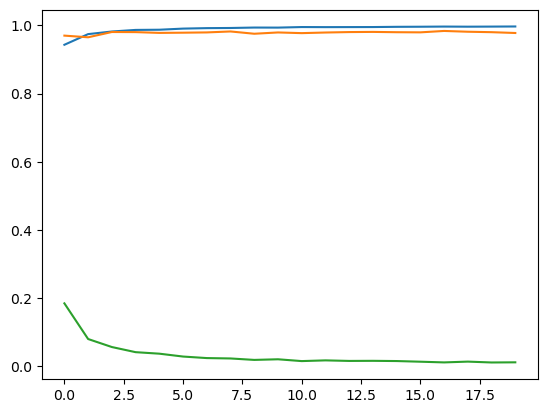

In [35]:
# Accuracy of training, validation and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])

In [36]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1657 - accuracy: 0.9779


In [37]:
score

[0.16565442085266113, 0.9779000282287598]